<a href="https://colab.research.google.com/github/ChahineBA/Agil-Analysis/blob/main/Agil_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing dataset & Description
df = pd.read_excel("/content/bi2018_2019.xlsx", index_col=None)

In [ ]:
#Dataset Description:
file_path = '/content/description.txt'

# Open the file and read its contents
with open(file_path, 'r') as file:
    contents = file.read()

# Print the contents
print(contents)

FileNotFoundError: [Errno 2] No such file or directory: '/content/description.txt'

In [ ]:
#Displaying Dataset
df.head()

,,CATPRD,CODAME,LIBAME,CODDPO,NOMDPO,CODPRD,CODEMB,LIBPRD,NUMCPT,NOMCLI,MOIS,CODGVR,LIBGVR,CODLOC,LIBLOC,TYPOPE,SUM(MNTHT),SUM(QTEPRD)
0,1,CARBURANT,700,DISTRIBUTEUR,1,GOULETTE,4,000,GASOIL,151140,SOCIETE GUAGUI MOHAMED ET FILS ...,02/18,1,TUNIS,75,LE BARDO,C,28077.686,26.000
1,2,GAZ,700,DISTRIBUTEUR,24,GPL RADES,33,06,AGILGAZ BOUT 6 KGS,391930,HASSEN CHARNI,01/18,1,TUNIS,98,EL OMRANE,G,508.858,204.000
2,3,CARBURANT,301,EXTRAC.ET RAFFINAGE DE PETROLE ET PROD.GAZ,20,SKHIRA,4,000,GASOIL,211311,E N I T U N I S I A B V (SUCCURSALE ...,01/18,23,TATAOUINE,91,OUED ZAR HAMMOUDA 18,C,65156.482,62.000
3,4,GAZ,501,HOTELLERIE,8,GABES,31,00,GAZ PROPANE VRAC,393720,MAGIC HOTELS KSAR ROUGE,02/18,19,TOZEUR,44,TOZEUR,G,11393.759,9.537
4,5,GAZ,501,HOTELLERIE,8,GABES,31,00,GAZ PROPANE VRAC,381601,PROMOTEL RAS EL AIN ...,02/18,19,TOZEUR,44,TOZEUR,G,3654.557,3.059


In [ ]:
#setting the first column name:
new_column_name = 'index'
current_column_names = df.columns.tolist()
current_column_names[0] = new_column_name
df.columns = current_column_names

In [ ]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117839 entries, 0 to 117838
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        117839 non-null  int64  
 1   CATPRD       117839 non-null  object 
 2   CODAME       117839 non-null  int64  
 3   LIBAME       117839 non-null  object 
 4   CODDPO       117839 non-null  int64  
 5   NOMDPO       117839 non-null  object 
 6   CODPRD       117839 non-null  int64  
 7   CODEMB       117839 non-null  object 
 8   LIBPRD       117839 non-null  object 
 9   NUMCPT       117839 non-null  int64  
 10  NOMCLI       117839 non-null  object 
 11  MOIS         117839 non-null  object 
 12  CODGVR       117839 non-null  int64  
 13  LIBGVR       117839 non-null  object 
 14  CODLOC       117839 non-null  int64  
 15  LIBLOC       117839 non-null  object 
 16  TYPOPE       117839 non-null  object 
 17  SUM(MNTHT)   117826 non-null  float64
 18  SUM(QTEPRD)  117824 non-

In [ ]:
#Numerical Features
df.describe()

,index,CODAME,CODDPO,CODPRD,NUMCPT,CODGVR,CODLOC,SUM(MNTHT),SUM(QTEPRD)
count,117839.000000,117839.000000,117839.000000,117839.000000,117839.000000,117839.000000,117839.000000,1.178260e+05,117824.000000
mean,58920.000000,588.587997,15.245428,26773.404272,229024.062382,10.952325,34.374452,3.596214e+04,341.799369
std,34017.333523,183.372496,10.721309,46933.863732,121730.848397,7.021144,24.999989,1.866997e+05,2798.674413
min,1.000000,100.000000,1.000000,0.000000,150300.000000,1.000000,1.000000,-1.717861e+06,-770.000000
25%,29460.500000,510.000000,2.000000,5.000000,153920.000000,4.000000,14.000000,4.008560e+02,3.000000
50%,58920.000000,700.000000,20.000000,10610.000000,155550.000000,11.000000,30.000000,2.228025e+03,10.000000
75%,88379.500000,700.000000,26.000000,32100.000000,227551.000000,17.000000,47.000000,2.011045e+04,29.000000
max,117839.000000,999.000000,70.000000,702000.000000,679041.000000,24.000000,99.000000,1.281765e+07,85848.000000


In [ ]:
#Categorical Features
df.describe(include=['O'])

,CATPRD,LIBAME,NOMDPO,CODEMB,LIBPRD,NOMCLI,MOIS,LIBGVR,LIBLOC,TYPOPE
count,117839,117839,117839,117839,117839,117839,117839,117839,117839,117839
unique,6,49,19,32,356,2430,24,24,429,9
top,LUBRIFIANT,DISTRIBUTEUR,GOULETTE LUBRIFIANT,000,GASOIL,"MIN. DEF. NATL, DIRECTION GLE.DES MATERIELS RO...",12/18,SFAX,SFAX,L
freq,59422,73345,37476,44674,20780,1871,5490,12325,7528,59422


In [ ]:
#Checking Missing Values:
missing_values = df.isnull().sum()
missing_values

index           0
CATPRD          0
CODAME          0
LIBAME          0
CODDPO          0
NOMDPO          0
CODPRD          0
CODEMB          0
LIBPRD          0
NUMCPT          0
NOMCLI          0
MOIS            0
CODGVR          0
LIBGVR          0
CODLOC          0
LIBLOC          0
TYPOPE          0
SUM(MNTHT)     13
SUM(QTEPRD)    15
dtype: int64

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
#Checking Missing Values Again:
missing_values = df.isnull().sum()
missing_values

index          0
CATPRD         0
CODAME         0
LIBAME         0
CODDPO         0
NOMDPO         0
CODPRD         0
CODEMB         0
LIBPRD         0
NUMCPT         0
NOMCLI         0
MOIS           0
CODGVR         0
LIBGVR         0
CODLOC         0
LIBLOC         0
TYPOPE         0
SUM(MNTHT)     0
SUM(QTEPRD)    0
dtype: int64

In [ ]:
#the columns that we don't need:
columns_to_delete = ['CATPRD', 'LIBAME', 'NOMDPO','CODEMB','NOMCLI','MOIS','LIBLOC','TYPOPE']
# Delete the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
#Checking Our Dataset:
df.head()

,index,CODAME,CODDPO,CODPRD,LIBPRD,NUMCPT,CODGVR,LIBGVR,CODLOC,SUM(MNTHT),SUM(QTEPRD)
0,1,700,1,4,GASOIL,151140,1,TUNIS,75,28077.686,26.000
1,2,700,24,33,AGILGAZ BOUT 6 KGS,391930,1,TUNIS,98,508.858,204.000
2,3,301,20,4,GASOIL,211311,23,TATAOUINE,91,65156.482,62.000
3,4,501,8,31,GAZ PROPANE VRAC,393720,19,TOZEUR,44,11393.759,9.537
4,5,501,8,31,GAZ PROPANE VRAC,381601,19,TOZEUR,44,3654.557,3.059


In [ ]:
#checking unique values:
# Iterate over each column
for column_name in df.columns:
    # Get unique values in the current column
    unique_values = df[column_name].nunique()

    # Display column name and unique values
    print(f"Column: {column_name}")
    print(unique_values)
    print()

Column: index
117824

Column: CODAME
49

Column: CODDPO
19

Column: CODPRD
196

Column: LIBPRD
355

Column: NUMCPT
2199

Column: CODGVR
24

Column: LIBGVR
24

Column: CODLOC
97

Column: SUM(MNTHT)
36004

Column: SUM(QTEPRD)
8342



In [ ]:
# Drop duplicates to ensure unique product codes with product names
product_names = df[['CODPRD', 'LIBPRD']].drop_duplicates(subset=['CODPRD'])

# Group by product code and sum the quantities sold
product_quantities = df.groupby('CODPRD')['SUM(QTEPRD)'].sum().reset_index()

# Merge the summed quantities with the unique product names
merged_data = pd.merge(product_quantities, product_names, on='CODPRD')

# Sort the result by total quantities sold in descending order
merged_data = merged_data.sort_values(by='SUM(QTEPRD)', ascending=False)

# Display the result
print(merged_data)

     CODPRD   SUM(QTEPRD)                        LIBPRD
14       33  3.525476e+07            AGILGAZ BOUT 6 KGS
2         4  1.326905e+06                        GASOIL
53    52200  6.424820e+05  CLADIUM S 500 SAE 40 VRAC KG
5         7  5.106722e+05                       JET A-1
3         5  4.701832e+05          SSP SUPER SANS PLOMB
..      ...           ...                           ...
71    70810  0.000000e+00           DEXRON III EST 20 L
168  170400  0.000000e+00           ASP C100 FUT 180 KG
77    71410  0.000000e+00  Eni ROTRA SX 75W80 EST 17 KG
150  131110  0.000000e+00        DICREA SX 100 EST 20 L
117  110810  0.000000e+00           BLASIA 460 EST 20 L

[196 rows x 3 columns]


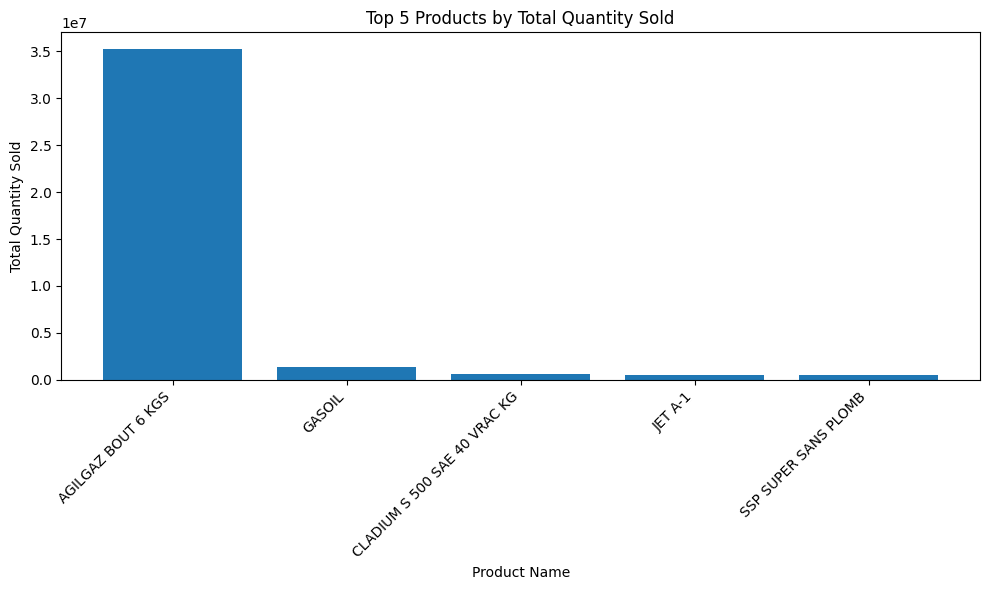

In [ ]:
# Select the top 5 products
top_5_products = merged_data.head(5)

# Plot the total quantity sold for the top 5 products
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['LIBPRD'], top_5_products['SUM(QTEPRD)'])
plt.title('Top 5 Products by Total Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Drop duplicates to ensure unique product codes with product names
product_names = df[['CODPRD', 'LIBPRD']].drop_duplicates(subset=['CODPRD'])

# Group by product code and sum the quantities sold
product_revenue = df.groupby('CODPRD')['SUM(MNTHT)'].sum().reset_index()

# Merge the summed quantities with the unique product names
merged_data = pd.merge(product_revenue, product_names, on='CODPRD')

# Sort the result by total quantities sold in descending order
merged_data = merged_data.sort_values(by='SUM(MNTHT)', ascending=False)

# Display the result
print(merged_data)

     CODPRD    SUM(MNTHT)                        LIBPRD
2         4  1.647760e+09                        GASOIL
5         7  8.115811e+08                       JET A-1
3         5  7.514213e+08          SSP SUPER SANS PLOMB
4         6  3.852942e+08                     GASOIL 50
7        13  2.457307e+08                           FOL
..      ...           ...                           ...
62    61010  0.000000e+00  ENI MULTITECH 15W40 EST 20 L
168  170400  0.000000e+00           ASP C100 FUT 180 KG
77    71410  0.000000e+00  Eni ROTRA SX 75W80 EST 17 KG
71    70810 -8.451000e+02           DEXRON III EST 20 L
18      888 -7.790537e+03     LUBRIFIANT DIVERS VRAC KG

[196 rows x 3 columns]


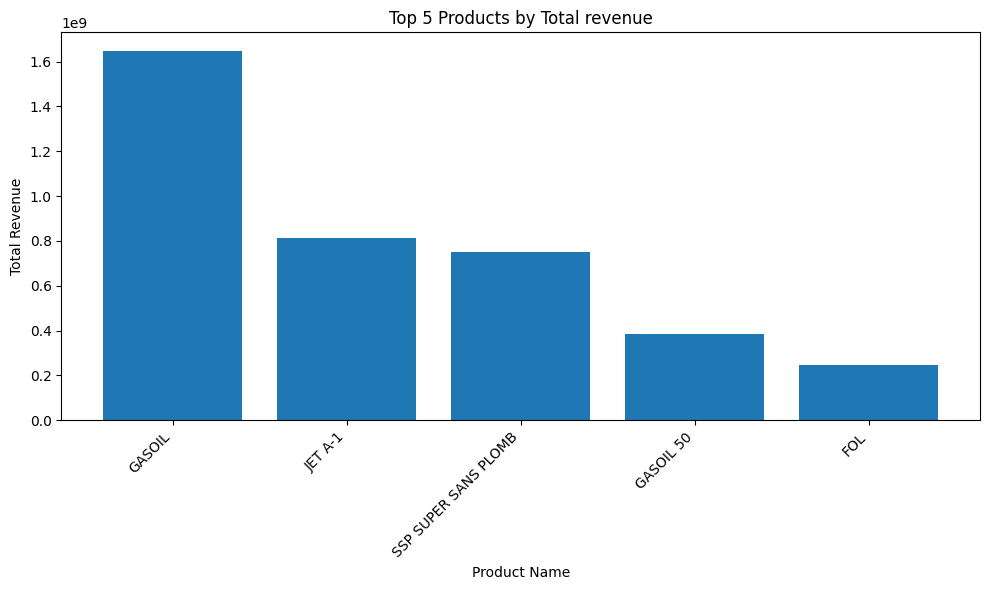

In [ ]:
# Select the top 5 products
top_5_products = merged_data.head(5)

# Plot the total quantity sold for the top 5 products
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['LIBPRD'], top_5_products['SUM(MNTHT)'])
plt.title('Top 5 Products by Total revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Group by product name and sum the revenue made
gov_revenue = df.groupby('LIBGVR')['SUM(MNTHT)'].sum().sort_values(ascending=False)
gov_revenue

LIBGVR
TUNIS          1.127945e+09
SFAX           3.898725e+08
SOUSSE         2.768351e+08
NABEUL         2.498914e+08
BIZERTE        2.208619e+08
BEN AROUS      2.184553e+08
JENDOUBA       1.980579e+08
MONASTIR       1.883445e+08
GAFSA          1.700245e+08
MAHDIA         1.594082e+08
ARIANA         1.501903e+08
MEDENINE       1.360992e+08
BEJA           1.190582e+08
GABES          1.054046e+08
KAIROUAN       7.819595e+07
TATAOUINE      7.765278e+07
ZAGHOUAN       7.550051e+07
SIDI BOUZID    7.066746e+07
KASSERINE      4.921105e+07
SILIANA        4.101191e+07
LE KEF         3.851814e+07
KEBILI         3.745943e+07
MANOUBA        3.101787e+07
TOZEUR         2.759168e+07
Name: SUM(MNTHT), dtype: float64

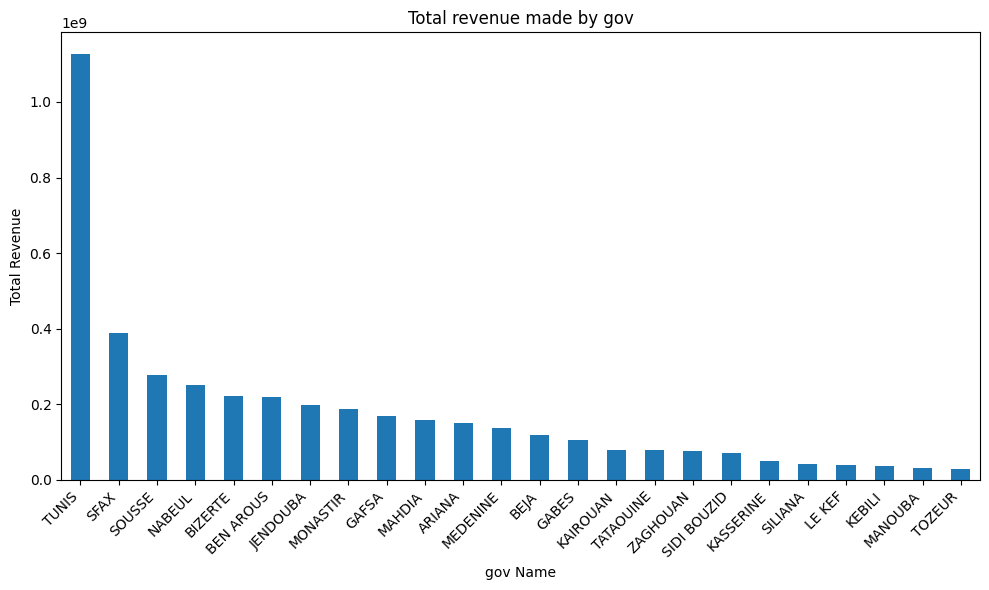

In [ ]:
# Plot the total revenue made by each gov
gov_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Total revenue made by gov')
plt.xlabel('gov Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Specify the file path for the Excel file
output_file_path = 'output.xlsx'

# Export the DataFrame to Excel
df.to_excel(output_file_path, index=False)

print(f"DataFrame exported to {output_file_path}")

DataFrame exported to output.xlsx


In [ ]:
df.head()

,index,CODAME,CODDPO,CODPRD,LIBPRD,NUMCPT,CODGVR,LIBGVR,CODLOC,SUM(MNTHT),SUM(QTEPRD)
0,1,700,1,4,GASOIL,151140,1,TUNIS,75,28077.686,26.000
1,2,700,24,33,AGILGAZ BOUT 6 KGS,391930,1,TUNIS,98,508.858,204.000
2,3,301,20,4,GASOIL,211311,23,TATAOUINE,91,65156.482,62.000
3,4,501,8,31,GAZ PROPANE VRAC,393720,19,TOZEUR,44,11393.759,9.537
4,5,501,8,31,GAZ PROPANE VRAC,381601,19,TOZEUR,44,3654.557,3.059
